In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['font.family'] = 'Nanum Brush Script'

In [ ]:
data = pd.read_csv('/content/final (1).csv')
data.head(3)

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171.81,[10% 할인] 시크릿코드 실무 완성편,19.09,190.9,default,CARD,NaN,2021-03-04 00:00:00
1,1004099,72297.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-04-11 15:18:35,113.00,NaN,NaN,113.0,INICIS,CARD,프론트엔드 개발,2021-02-02 00:00:00
2,1181420,72297.0,205162.0,PAYMENT,COMPLETED,올인원 패키지 : 아카데미 : 편집하는여자의 영상편집 마스터클래스 - 제 1강 프리...,영상/3D,올인원,2021-06-30 20:24:24,98.00,NaN,NaN,98.0,PAYCO,CARD,영상 편집,2021-06-03 00:00:00


In [ ]:
data.info() #총 50566개 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50566 entries, 0 to 50565
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      50566 non-null  int64  
 1   customer_id             50566 non-null  float64
 2   course_id               48588 non-null  float64
 3   type                    50566 non-null  object 
 4   state                   50566 non-null  object 
 5   course_title            50566 non-null  object 
 6   category_title          50566 non-null  object 
 7   format                  50566 non-null  object 
 8   completed_at            50566 non-null  object 
 9   transaction_amount      50566 non-null  float64
 10  coupon_title            23150 non-null  object 
 11  coupon_discount_amount  23150 non-null  float64
 12  sale_price              50566 non-null  float64
 13  pg                      50566 non-null  object 
 14  method                  50566 non-null

1. **고객군 분석** : **`패스트캠퍼스에서 강의를 구매하는 사람들은 어떤 그룹으로 분류될까요?`**  
강의 수 & 총 액 으로 등급을 나눠 보자.



> 고객이 구매한 강의 수에 따른 점수 부여



In [ ]:
#75%의 고객이 1개 선택
count2 = pd.DataFrame(data['customer_id'].value_counts())
count2.describe()

,customer_id
count,37879.000000
mean,1.334935
std,1.011571
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,53.000000


In [ ]:
#하지만, 1개 선택 고객부터 6개 선택 고객까지 연속적으로 분포해 있음 
count2.rename(columns={'customer_id':'c_purchase_count'}, inplace=True)
count2

,c_purchase_count
98685.0,53
50769.0,39
40783.0,34
65665.0,27
20784.0,26
...,...
543318.0,1
542013.0,1
543306.0,1
543277.0,1


In [ ]:
count2.index.name = 'customer_id'
count2

,c_purchase_count
customer_id,
98685.0,53
50769.0,39
40783.0,34
65665.0,27
20784.0,26
...,...
543318.0,1
542013.0,1
543306.0,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


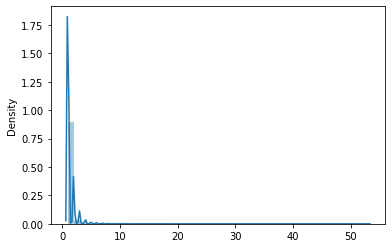

In [ ]:
#정규분포 그래프에 따라 이탈:1개, 이탈위험:2-3개, 일반:4-10개, vip:11-78개 로 나누기로 결정
sns.distplot(count2) 

In [ ]:
#점수 부여하기
def score(row): 
  if row > 10 :
    return 4
  elif  row > 3 and row  <= 10 :
    return 3
  elif row == 2 or row == 3:
    return 2
  elif row ==1:
    return 1

count2['c_purchase_level'] = count2.c_purchase_count.apply(score)


In [ ]:
count2

,c_purchase_count,c_purchase_level
customer_id,,
98685.0,53,4
50769.0,39,4
40783.0,34,4
65665.0,27,4
20784.0,26,4
...,...,...
543318.0,1,1
542013.0,1,1
543306.0,1,1


In [ ]:
#원본 dataframe에 붙여주기
data = pd.merge(data,count2,on='customer_id')
data.head(3)

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,c_purchase_count,c_purchase_level
0,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171.81,[10% 할인] 시크릿코드 실무 완성편,19.09,190.9,default,CARD,NaN,2021-03-04 00:00:00,5,3
1,1004099,72297.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-04-11 15:18:35,113.00,NaN,NaN,113.0,INICIS,CARD,프론트엔드 개발,2021-02-02 00:00:00,5,3
2,1181420,72297.0,205162.0,PAYMENT,COMPLETED,올인원 패키지 : 아카데미 : 편집하는여자의 영상편집 마스터클래스 - 제 1강 프리...,영상/3D,올인원,2021-06-30 20:24:24,98.00,NaN,NaN,98.0,PAYCO,CARD,영상 편집,2021-06-03 00:00:00,5,3


###창헌님 파일 합처주기

고객군 분류의 두번째 기준인 고객별 누적 금액 기준으로 나눈 파일 합치기

In [ ]:
score2 = pd.read_csv('/content/score2.csv')

In [ ]:
score2 = pd.DataFrame(score2.loc[:,['customer_id','trans_level']])

In [ ]:
data = pd.merge(data,score2,on='customer_id')

In [ ]:
data.head(3)

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,c_purchase_count,c_purchase_level,trans_level
0,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171.81,[10% 할인] 시크릿코드 실무 완성편,19.09,190.9,default,CARD,NaN,2021-03-04 00:00:00,5,3,1
1,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171.81,[10% 할인] 시크릿코드 실무 완성편,19.09,190.9,default,CARD,NaN,2021-03-04 00:00:00,5,3,1
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171.81,[10% 할인] 시크릿코드 실무 완성편,19.09,190.9,default,CARD,NaN,2021-03-04 00:00:00,5,3,1


####점수 합산

고객 별 강의수 점수와 금액 점수 합산

In [ ]:
data['total_score'] = data['trans_level']+data['c_purchase_level']

####고객 군 분류

In [ ]:
data['group'] = pd.cut(data['total_score'],4,labels=['이탈','이탈위험','일반','VIP'])

####EDA
각 고객군별 구매한 강의 수

(0.0, 55.0)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_

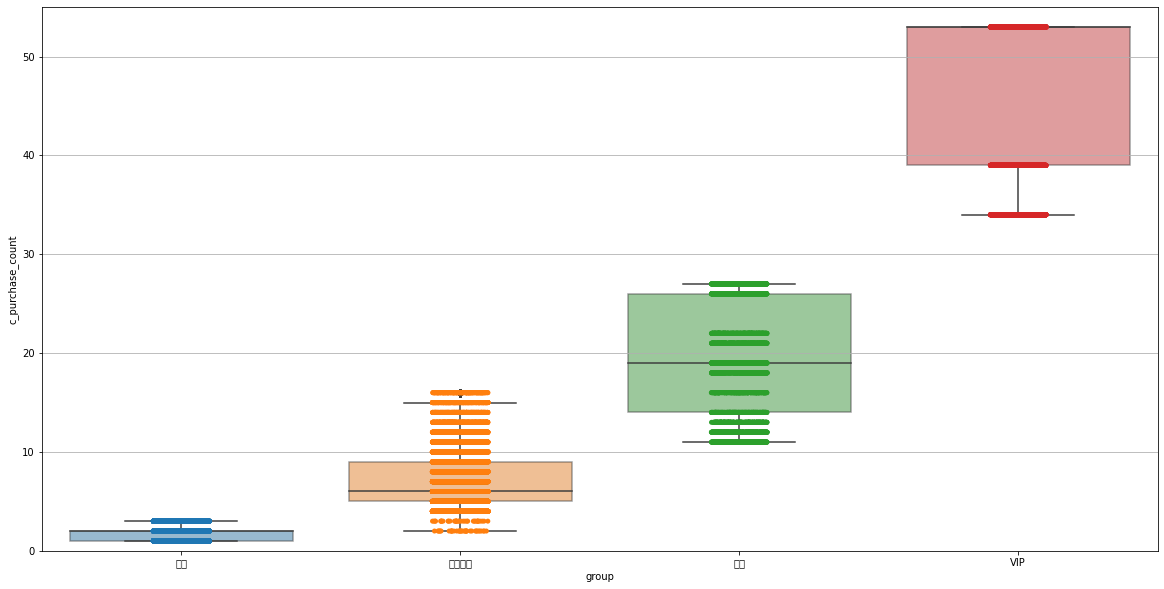

In [ ]:
unique_data = data

fig, ax = plt.subplots(figsize = (20,10))
plt.grid()
plt.rcParams['font.family'] = 'AppleGothic'
sns.stripplot(x = 'group', y = 'c_purchase_count', data = data)
sns.boxplot(x='group' , y = 'c_purchase_count' , data= data, boxprops = dict(alpha=0.5),order = ['이탈' , '이탈위험', '일반', 'VIP'])
ax.set_ylim([0, 55])